In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
P1=[0.1,0.6]
P2=[0.15,0.71]
P3=[0.08,0.9] 
P4=[0.16, 0.85] 
P5=[0.2,0.3]
P6=[0.25,0.5]
P7=[0.24,0.1]
P8=[0.3,0.2]
K=2

points=[P1,P2,P3,P4,P5,P6,P7,P8]

# Sklearn Implementation

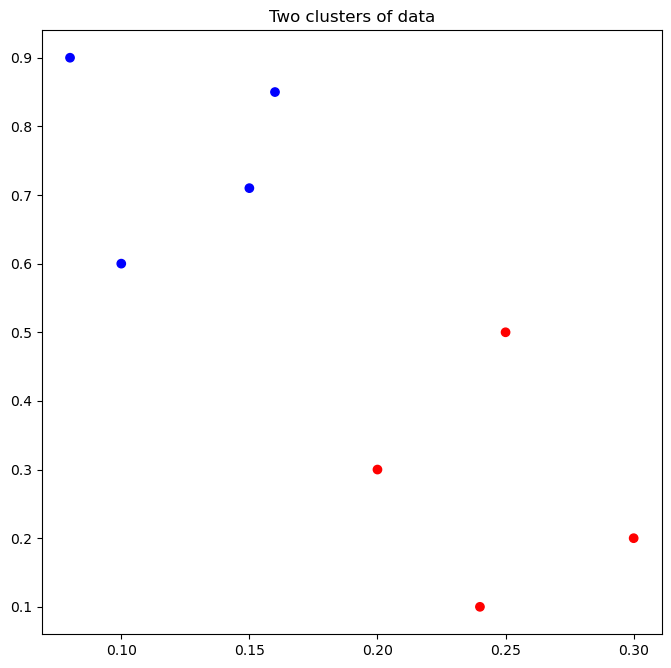

In [24]:
from sklearn.cluster import KMeans

# Configuration options
num_samples_total = 8
cluster_centers = [(0.1,0.6), (0.3, 0.2)]
num_classes = len(cluster_centers)

X = np.array(points)

# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes)
kmeans.fit(X)

# Predict the cluster for all the samples
P = kmeans.predict(X)

# Generate scatter plot for training data
colors = list(map(lambda x: 'blue' if x == 1 else 'red', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters of data')
plt.show()

In [25]:
kmeans.cluster_centers_

array([[0.2475, 0.275 ],
       [0.1225, 0.765 ]])

# From Scratch

In [26]:
def distance(p1,p2):
    distance = 0
    for i in range(len(p1)):
        distance+=(p1[i]-p2[i])**2
        
    return np.sqrt(distance)

In [27]:
def cluster(C1,C2):
    c1 = C1
    c2 = C2
    cluster1=list()
    cluster2=list()
        
    for p in points:
        d1 = distance(p,C1)
        d2 = distance(p,C2)
        if d1<d2:
            cluster1.append(p)
            x,y=0,0
            for i in cluster1:
                x+=i[0]
                y+=i[1]
            C1 = [x/len(cluster1),y/len(cluster1)]
            
        else:
            cluster2.append(p)
            x,y=0,0
            for i in cluster2:
                x+=i[0]
                y+=i[1]
            C2 = [x/len(cluster2),y/len(cluster2)]
    
    if C1[0]==c1[0] and C1[1]==c1[1] and C2[0]==c2[0] and C2[1]==c2[1]:
        print("Clusters are:")
        print(cluster1)
        print(cluster2)
        
        if [0.25,0.5] in cluster1:
            print("P6 belongs to cluster 1")
        elif [0.25,0.5] in cluster2:
            print("P6 belongs to cluster 2")
            
        print("Population of cluster around m2:",len(cluster2))
        print("Updated value of centroids:")
        print("C1:",C1)
        print("C2:",C2)
        
        P=list()
        for i in points:
            if i in cluster1:
                P.append(0)
            else:
                P.append(1)

        # Generate scatter plot for training data
        X = np.array(points)
        colors = list(map(lambda x: 'blue' if x == 1 else 'red', P))
        plt.scatter(X[:,0], X[:,1], c=colors, marker="o")
        plt.plot(C1[0],C1[1],marker="o",color='black')
        plt.plot(C2[0],C2[1],marker="o",color='black')
        plt.title('Two clusters of data')
        plt.show()
        
        
    else:
        cluster(C1,C2)

Clusters are:
[[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85]]
[[0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]
P6 belongs to cluster 2
Population of cluster around m2: 4
Updated value of centroids:
C1: [0.1225, 0.765]
C2: [0.2475, 0.275]


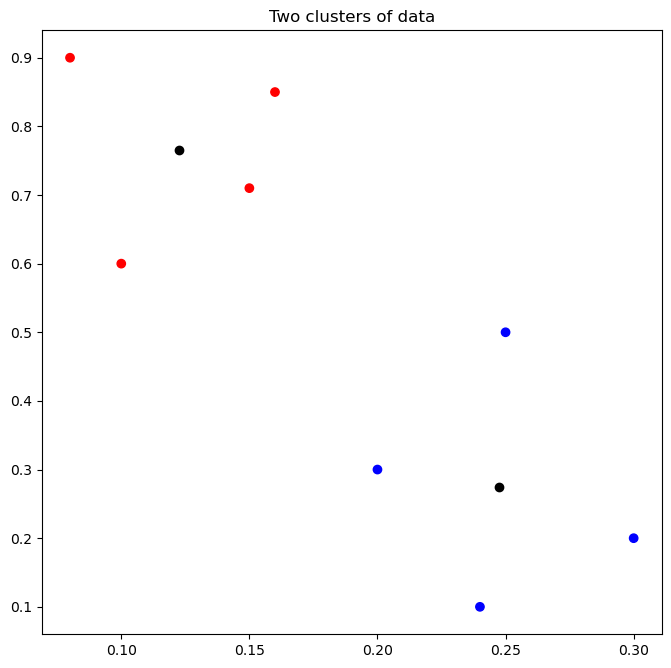

In [28]:
C1=P1
C2=P8
cluster(C1,C2)